Importing Libraries

In [1]:
import keras
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Read data CSV

In [2]:
df_path = 'preprocessed_dataset/preprocessed_dataset.csv'
# df_path = 'preprocessed_dataset/sinhala_singlish_preprocessed.csv'
# df_path = 'preprocessed_dataset/sinhala_only_preprocessed.csv'

In [3]:
df = pd.read_csv(df_path)

In [4]:
df.head()

,Phrase,IsHateSpeech
0,මේ බැල්ලි කොටින් ගු කනකොට අපහසුවක් දැනුනෙ නැද්...,YES
1,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆි ගත්තා ස...,YES
2,සංහිදියා අවුල වෙයි ද,NO
3,කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා ...,YES
4,මචන් ඔය මගුල නවත්තල කොන්ද තියෙනවානම් පුලුවන්නම...,YES


In [5]:
len(df)

1809

Missing values checking

In [6]:
df.isnull().sum()

Phrase          0
IsHateSpeech    0
dtype: int64

In [7]:
df = df.dropna(subset=["Phrase"])

In [8]:
df.isnull().sum()

Phrase          0
IsHateSpeech    0
dtype: int64

In [9]:
# df = df.drop(columns=["PhraseNo"])
# df.head()

In [10]:
df.shape

(1809, 2)

In [11]:
X = df['Phrase']
y = df['IsHateSpeech']

<AxesSubplot:xlabel='IsHateSpeech', ylabel='count'>

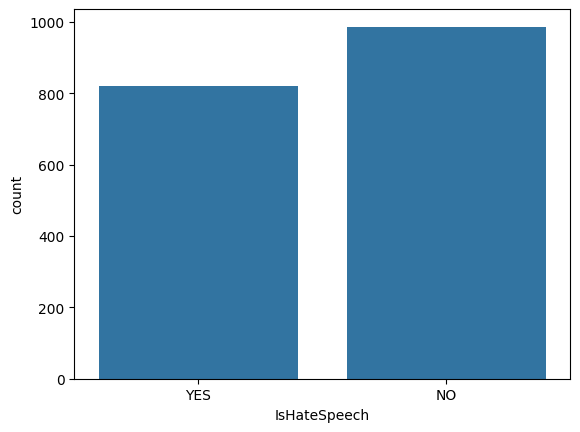

In [12]:
sns.countplot(x=df['IsHateSpeech'])

In [13]:
df['IsHateSpeech'].value_counts()

IsHateSpeech
NO     987
YES    822
Name: count, dtype: int64

Splitting dataset into train and test (80:20 ratio)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
print(y_train)

227      NO
668      NO
1678    YES
1600     NO
1175    YES
       ... 
835      NO
1216    YES
1653     NO
559      NO
684      NO
Name: IsHateSpeech, Length: 1447, dtype: object


In [16]:
print(y_train)

227      NO
668      NO
1678    YES
1600     NO
1175    YES
       ... 
835      NO
1216    YES
1653     NO
559      NO
684      NO
Name: IsHateSpeech, Length: 1447, dtype: object


In [17]:
print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  1447
Test dataset:  362


 Vectorize the text data

In [18]:
vectorizer = TfidfVectorizer()
train_data_features = vectorizer.fit_transform(X_train)
train_data_features = train_data_features.toarray()
testing_data = vectorizer.transform(X_test)
testing_data = testing_data.toarray()

joblib.dump(vectorizer, 'vectorizor/vectorizer.pkl')

['vectorizor/vectorizer.pkl']

In [19]:
train_data_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Metrics

In [20]:
def get_metrics(true_labels, predicted_labels):
    correctly_identified_y = predicted_labels == true_labels

    print("Confusion metrix: ")
    cm = confusion_matrix(true_labels, predicted_labels)
    print(cm)
    
    print()

    accuracy = np.mean(correctly_identified_y) * 100
    print ('Accuracy = %.0f%%' %accuracy)

    precision = (cm[0][0]/(cm[0][0]+cm[1][0]))* 100
    print ('precision = %.1f%%' %precision)

    recall = (cm[0][0]/(cm[0][0]+cm[0][1]))* 100
    print ('recall = %.1f%%' %recall)

    F1_Score = 2*((precision*recall)/(precision+recall))
    print ('F1 Score = %.1f%%' %F1_Score)

Naive Bayes

In [21]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_data_features, y_train)

MultinomialNB()

In [22]:
naive_bayes_model_predictions = naive_bayes_model.predict(testing_data)

In [23]:
get_metrics(y_test, naive_bayes_model_predictions)

Confusion metrix: 
[[165  23]
 [ 76  98]]

Accuracy = 73%
precision = 68.5%
recall = 87.8%
F1 Score = 76.9%


Logistic Regression

In [24]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(train_data_features, y_train)

LogisticRegression()

In [25]:
logistic_regression_model_predictions = logistic_regression_model.predict(testing_data)

In [26]:
get_metrics(y_test, logistic_regression_model_predictions)

Confusion metrix: 
[[160  28]
 [ 68 106]]

Accuracy = 73%
precision = 70.2%
recall = 85.1%
F1 Score = 76.9%


Random Forest

In [27]:
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=0)

random_forest_model.fit(train_data_features, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [28]:
random_forest_model_predictions = random_forest_model.predict(testing_data)

In [29]:
get_metrics(y_test, random_forest_model_predictions)

Confusion metrix: 
[[153  35]
 [ 64 110]]

Accuracy = 73%
precision = 70.5%
recall = 81.4%
F1 Score = 75.6%


SVM

In [30]:
svm_model = SVC(kernel='linear')

svm_model.fit(train_data_features, y_train)

SVC(kernel='linear')

In [31]:
svm_model_predictions = svm_model.predict(testing_data)

In [32]:
get_metrics(y_test, svm_model_predictions)

Confusion metrix: 
[[157  31]
 [ 61 113]]

Accuracy = 75%
precision = 72.0%
recall = 83.5%
F1 Score = 77.3%


KNN

In [33]:
k_values = range(1, 31)

cross_val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_data_features, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

best_k = k_values[cross_val_scores.index(max(cross_val_scores))]
print(f"The best value of k is {best_k}")

The best value of k is 25


In [34]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)

knn_model.fit(train_data_features, y_train)

KNeighborsClassifier(n_neighbors=25)

In [35]:
knn_model_predictions = knn_model.predict(testing_data)

In [36]:
get_metrics(y_test, knn_model_predictions)

Confusion metrix: 
[[172  16]
 [109  65]]

Accuracy = 65%
precision = 61.2%
recall = 91.5%
F1 Score = 73.3%


Saving Models

In [37]:
joblib.dump(naive_bayes_model, 'models/naive_bayes_model.joblib')
joblib.dump(logistic_regression_model, 'models/logistic_regression_model.joblib')
joblib.dump(random_forest_model, 'models/random_forest_model.joblib')
joblib.dump(svm_model, 'models/svm_model.joblib')
joblib.dump(knn_model, 'models/knn_model.joblib')

['models/knn_model.joblib']